# Projeto Final

## Equipe:

* Ednael Vieira
* Priscilla Amarante

## Entregáveis: código e relatório

1) Objetivo: Realizar um agrupamento não supervisionado de dados (Clustering) nos registros do cliente do banco de dados de uma empresa de alimentos; 

2) Metodologia: Utilizamos agrupamento de dados (clustering) paraencontrar padrões nos dados observados, com os métodos: 
    
    - KMeans + PCA
    - KMeans + UMAP
    - SOM + PCA
    - SOM + UMAP

3) Análise de resultados; 

        Ao fim da execução de cada modelo, foram feitas considerações acerca dos resultados obtidos pelos agrupamentos

# Dataset

Neste projeto, iremos realizar um agrupamento não supervisionado de dados nos registros do cliente do banco de dados de uma empresa de alimentos. A segmentação de clientes é a prática de separar os clientes em grupos que refletem semelhanças entre os clientes em cada cluster. Vamos dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio. Modificar produtos de acordo com necessidades e comportamentos distintos dos clientes. Também ajuda a empresa a atender às preocupações de diferentes tipos de clientes.
Nossa base de dados pode ser acessada no Kaggle, em https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering/data

# Pipeline do miniprojeto

- <b>Análise exploratória dos dados</b>
    - Destinada a obter uma compreensão geral sobre o dataset
- <b>Compreensão dos dados</b>
    - Esta fase é dedicada a uma exploração mais detalhada de Dados para obter uma melhor compreensão das características e suas inter-relações.

In [1]:
import numpy as np
import pandas as pd
import locale
from matplotlib import pyplot as plt
from utils import show_value_counts,plot_grid
#encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Clustering
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier 

# Análise Exploratória 

In [2]:
df = pd.read_csv(r'C:\Users\efvs\Downloads\marketing_campaign.csv',sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
categorical_columns = ['Marital_Status', 'Education']

In [8]:
train_plotting_infos = [{'serie': df[column]} for column in categorical_columns]

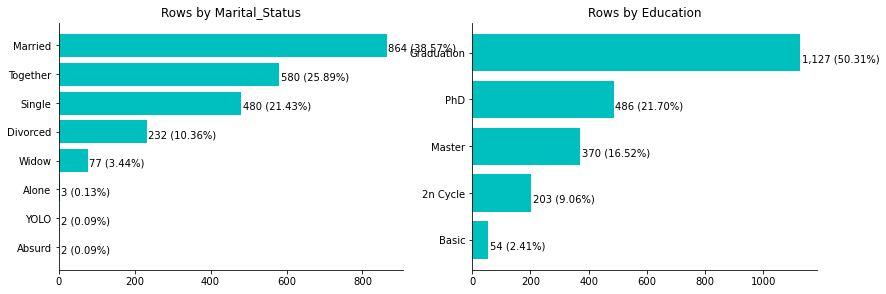

<Figure size 360x720 with 0 Axes>

<Figure size 360x720 with 0 Axes>

In [9]:
plot_grid([[show_value_counts, plotting_info] for plotting_info in train_plotting_infos], 
            n_cols=3, width_scale=7, height_scale=5)

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

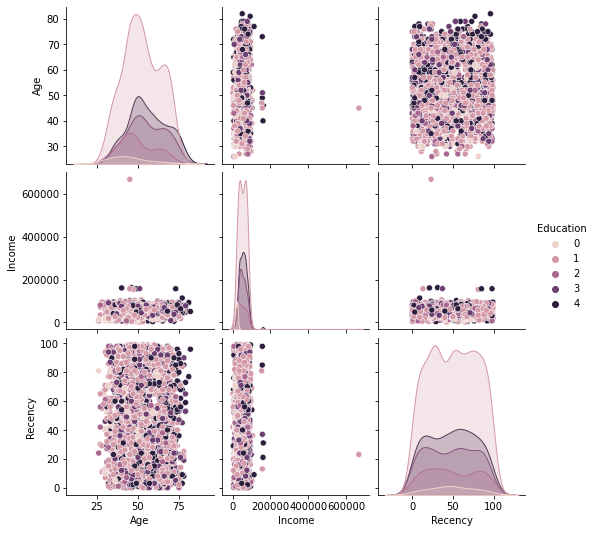

In [34]:
import seaborn as sns
sns.pairplot(df[['Education','Age','Income','Recency']],hue='Education')
plt.show()

## Compreensão de dados

1. Age: Idade (15 - 80)
2. Education: Educação
3. Marital_Status: Estado civil - cat
4. Income: Renda
5. Dt_Customer: Data de inscrição do cliente na empresa
6. Recency: Número de dias desde a última compra do cliente
7. MntWines: Valor gasto em vinho
8. MntFruits: Valor gasto em frutas
9. MntMeatProducts: Valor gasto em carnes
10. MntFishProducts: Valor gasto em peixes
11. MntSweetProducts: Valor gasto com doces
12. MntGoldProds: Valor gasto produtos
13. NumDealsPurchases: Números de compras de ofertas
14. NumWebPurchases: Número de compras de aplicativos
15. NumCatalogPurchases: Número de compras de catálogo
16. NumStorePurchases: Número de compras na loja
17. NumWebVisitsMonth: Número de visitas na Web por mês
18. num_filhos: Número de filhos
19. Camp_Aceitas: Campanhas aceitas

As demais colunas com os demais fatores, por apresentarem uma relevância menor (o que não indica que seja inexistente), serão *dropadas* para fins de análise **neste** estudo.

## Dados numéricos

In [13]:
#Removendo variáveis sem documentação
df.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)

<AxesSubplot:title={'center':'Matriz de correlação de Pearson'}>

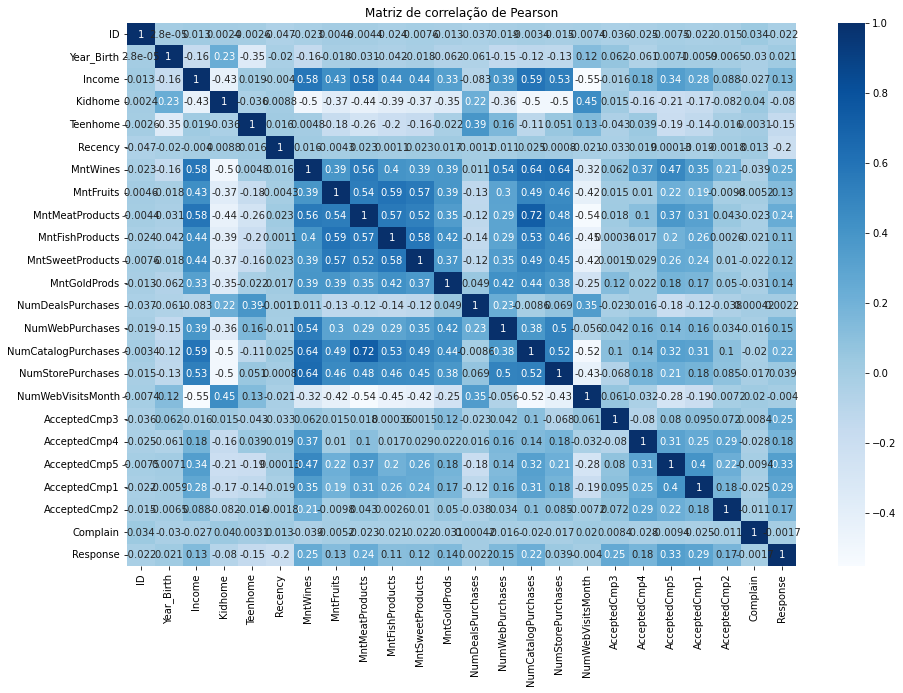

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Matriz de correlação de Pearson")
sns.heatmap(df.corr(),annot=True,cmap="Blues")

## Dados categóricos

In [15]:
data_cat=df[['Marital_Status', 'Education']]

In [16]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data_cat.columns :
  data_encoded[i]=label.fit_transform(data_cat[i])

### Construção da função V de Cramer

In [17]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [18]:
# Building of the confusion matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

<AxesSubplot:>

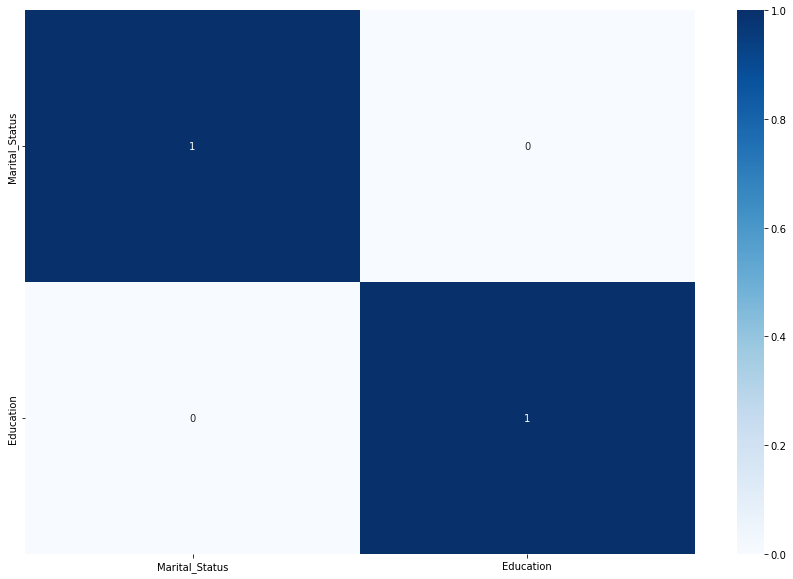

In [19]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df,annot=True,cmap="Blues")

O gráfico mostra, que não existe correlação considerável entre as duas features

# Data Preparation

In [20]:
df = pd.read_csv(r'C:\Users\efvs\Downloads\marketing_campaign.csv',sep='\t')

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Encoding - Categóricos

- Nesta etapa, transformaremos as variáveis categóricas para numéricas, do seguinte modo:
    - Usaremos OrdinalEncoding para as variáveis categóricas, que onde existe grau de importância; 
    - Usaremos apenas o LabelEncoder para as que não.

In [23]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [24]:
def ordinal_encoder(value):
    if value == 'Basic':
        return 0
    elif value == 'Graduation':
        return 1
    elif value == '2n Cycle':
        return 2
    elif value == 'Master':
        return 3
    elif value == 'PhD':
        return 4

df['Education'] = df.Education.apply(ordinal_encoder)

In [25]:
enc = LabelEncoder()
df['Marital_Status']=enc.fit_transform(df['Marital_Status'])

In [26]:
enc2 = LabelEncoder()
df['Dt_Customer']=enc.fit_transform(df['Dt_Customer'])

In [27]:
df=df.dropna(axis=0)

# Feature Engineering

Ações pare redução da dimensionalidade e melhor compreensão do problema

In [28]:
# Agregando número de filhos
df['num_filhos']=df['Kidhome']+df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [29]:
df['Year_Birth'] = 2022 - df['Year_Birth']

In [30]:
df.rename({'Year_Birth':'Age'},axis=1,inplace=True)

<AxesSubplot:>

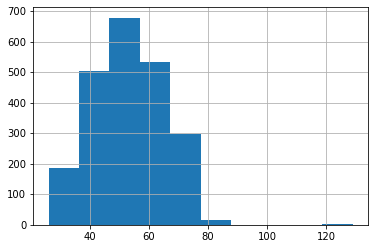

In [31]:
df['Age'].hist()

In [32]:
#Removendo outliers na idade
df = df[df['Age']<100]

In [33]:
#Agregando as informações de compra
df['Camp_Aceitas'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + 
                    df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'])
    
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
         'AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)

## Encoding - Numéricos

- Nesta etapa, normalizaremos os dados numéricos, propositalmente após as mudanças em algumas features
- Faremos 2 abordagens, para possibilitar testes de adequação dos modelos e legibilidade

In [35]:
norm_Z = StandardScaler()
df_copiado = df.copy()

df_norm = pd.DataFrame(norm_Z.fit_transform(df_copiado),columns=df_copiado.columns)

In [36]:
df_norm.describe()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,num_filhos,Camp_Aceitas
count,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,...,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2.213000e+03,2213.0,2213.0,2.213000e+03,2.213000e+03
mean,-1.846191e-17,-5.368001e-17,1.781976e-16,3.898072e-17,-5.986481e-17,-1.222663e-16,-7.008502e-17,3.446558e-17,-2.272621e-17,-9.205871e-18,...,1.087146e-16,-3.368797e-17,8.152338e-17,1.605383e-18,1.436818e-16,1.210559e-16,0.0,0.0,-5.618842e-18,-3.174144e-16
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,0.0,0.0,1.000226e+00,1.000226e+00
min,-1.720589e+00,-2.315241e+00,-1.601115e+00,-3.458999e+00,-2.006386e+00,-1.726214e+00,-1.693697e+00,-9.048848e-01,-6.626231e-01,-7.447847e-01,...,-8.495469e-01,-1.208623e+00,-1.491279e+00,-9.128811e-01,-1.786219e+00,-2.194943e+00,0.0,0.0,-1.264914e+00,-4.390416e-01
25%,-8.536577e-01,-6.909718e-01,-8.184183e-01,-6.740979e-01,-6.749549e-01,-8.630510e-01,-8.642613e-01,-8.337166e-01,-6.122794e-01,-6.734121e-01,...,-6.754254e-01,-6.888633e-01,-7.616306e-01,-9.128811e-01,-8.631468e-01,-9.575968e-01,0.0,0.0,-1.264914e+00,-4.390416e-01
50%,-4.062081e-02,-9.255708e-02,-8.184183e-01,2.542025e-01,-3.430598e-02,-1.041459e-02,-2.654845e-04,-3.859500e-01,-4.612484e-01,-4.414510e-01,...,-3.852230e-01,-1.691039e-01,-3.198189e-02,-2.294556e-01,-2.477654e-01,2.797495e-01,0.0,0.0,6.997140e-02,-4.390416e-01
75%,8.725058e-01,8.478090e-01,7.469747e-01,1.182503e+00,6.455518e-01,8.264322e-01,8.637304e-01,5.926127e-01,1.680473e-01,2.901187e-01,...,2.338754e-01,3.506556e-01,6.976669e-01,4.539700e-01,6.753067e-01,6.921982e-01,0.0,0.0,6.997140e-02,-4.390416e-01
max,1.725887e+00,2.472078e+00,1.529671e+00,3.039104e+00,2.440836e+01,1.758016e+00,1.727726e+00,3.522370e+00,4.346571e+00,6.950079e+00,...,5.360784e+00,6.587769e+00,8.358979e+00,8.655077e+00,2.213760e+00,6.054032e+00,0.0,0.0,2.739742e+00,5.449437e+00


# Redução de Dimensionalidade
- PCA
- UMAP

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduzido = pca.fit_transform(df_norm)
reduzido.shape

(2213, 2)

<Figure size 432x288 with 0 Axes>

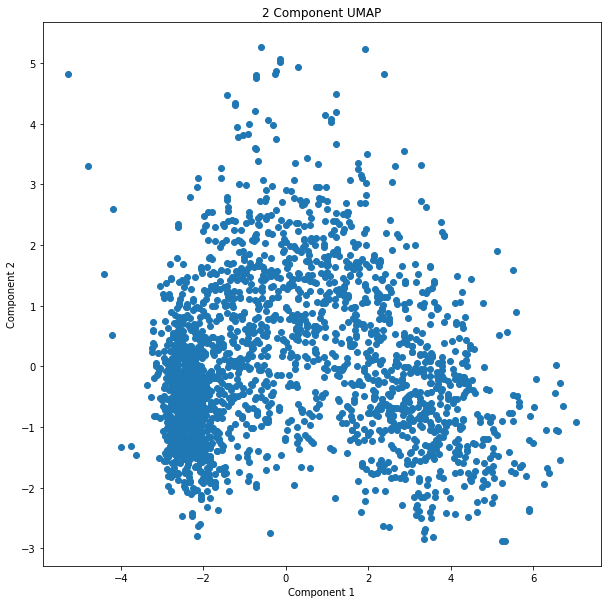

In [38]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(reduzido[:,0], reduzido[:,1])

<Figure size 432x288 with 0 Axes>

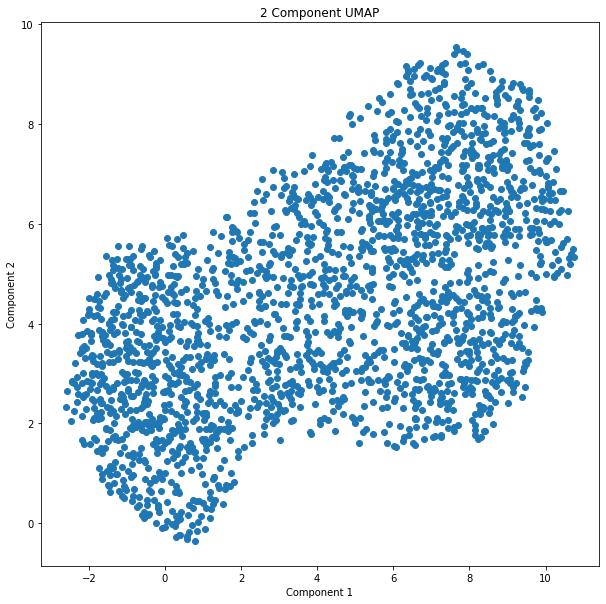

In [39]:
# Implementing UMAP.
import umap
embedding = umap.UMAP(n_neighbors=15,
                      min_dist=0.5,
                      metric='correlation').fit_transform(df_norm)

umap_component1 = embedding[:,0]
umap_component2 = embedding[:,1]

plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(umap_component1, umap_component2)

A grosso modo, já é possível perceber que o método UMAP, faz uma redução de dimensionalidade nos dados que apresenta, visualmente, um menor número de outliers, ou seja, pontos muito distantes do agrupamento geral do que o PCA

# Clusterizando com: SOM + PCA

In [40]:
som_x = 1
som_y = 7
data = np.array(reduzido)

som = MiniSom(x=som_x,
             y=som_y,
             input_len=data.shape[1],
             sigma=0.5,
             learning_rate=0.5)

#som.random_weights_init(data)

In [41]:
som.train_random(data,100)

In [42]:
from pylab import plot,axis,show,pcolor,colorbar,bone

In [43]:
som_shape = (1, 7)
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

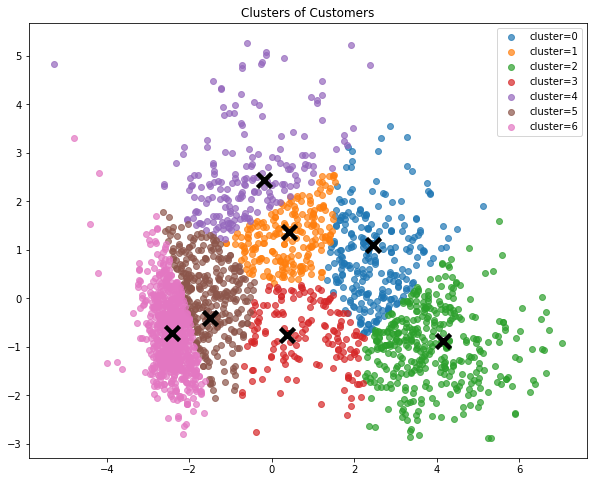

In [44]:
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.legend();

# SOM com o UMAP

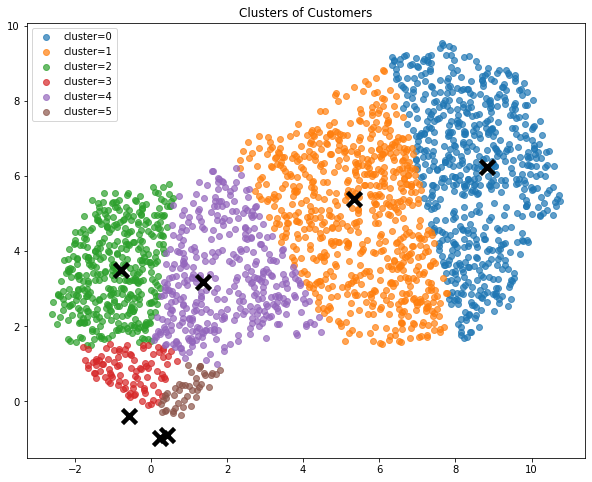

In [45]:
som_x = 1
som_y = 7
data = np.array(embedding)

som = MiniSom(x=som_x,
             y=som_y,
             input_len=data.shape[1],
             sigma=0.5,
             learning_rate=0.5)

som.train_random(data,100)

som_shape = (1, 7)
# each neuron represents a cluster

winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.legend();

# Clusterizando com: KMEANS+PCA

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(reduzido)
kmeans.labels_
kmeans.fit(reduzido)

KMeans(n_clusters=7, random_state=0)

In [47]:
reduzido = pd.DataFrame(reduzido)

In [48]:
predictions = kmeans.predict(reduzido)
centers=kmeans.cluster_centers_

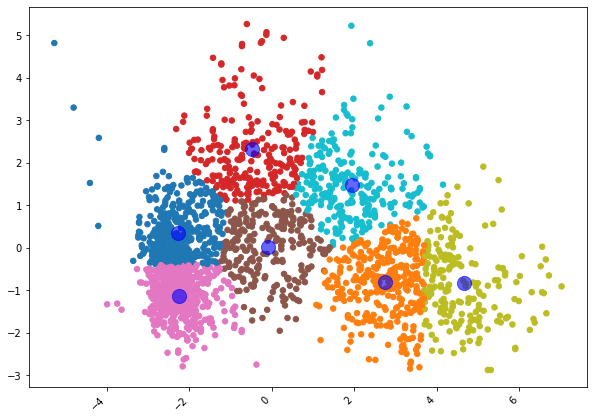

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(reduzido.iloc[:,0],reduzido.iloc[:,1],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [50]:
df['classes01'] = kmeans.labels_

#### Distribuição das idades dos clientes por classe

In [51]:
params=['max','mean','min','std']

In [52]:
agg1=df.groupby(['classes01']).agg({'Age':params,'Education':params,'Income':params}).sort_values(by=('Income',  'mean'),ascending=False)

In [53]:
agg1

Age                           Education                          \
          max       mean min        std       max      mean min       std   
classes01                                                                   
5          81  54.316583  27  13.382684         4  1.854271   1  1.160751   
1          79  52.150769  27  13.199749         4  1.956923   1  1.229018   
6          79  58.360000  31  10.027192         4  2.324000   0  1.327431   
3          82  54.340000  30  11.391905         4  2.004000   0  1.220633   
2          76  58.318777  32   9.767411         4  2.628821   1  1.313643   
0          77  55.253623  31   9.620445         4  2.359903   0  1.321616   
4          76  46.353480  26   9.831309         4  1.576923   0  1.103181   

             Income                                       
                max          mean      min           std  
classes01                                                 
5          666666.0  85265.723618  58138.0  42949.414605  
1           96547.0  72782.969231  32632.0   9055.177205  
6          157243.0  66201.092000   2447.0  13042.561091  
3          162397.0  55919.664000  22507.0  16194.189646  
2           77622.0  53195.371179   7144.0   9076.536860  
0           65808.0  37147.555556   1730.0  11556.348134  
4          153924.0  30927.095238   3502.0  12121.488692

Como fruto deste agrupamento , `temos que`:

  - O `nível educacional médio mais alto` não está junto da maior renda média
  - Em todos os agrupamentos, há pessoas com escolaridade máxima, mas nem em todos, há pessoas com escolaridade mínima
  - As pessoas da classe 2, possuem uma idade média inferior aos demais, ou seja, são pessoas mais jovens

# Clusterizando com: KMEANS + UMAP

In [54]:
kmeans2 = KMeans(n_clusters=7, random_state=0).fit(embedding)
kmeans2.labels_
kmeans2.fit(embedding)

KMeans(n_clusters=7, random_state=0)

In [55]:
embedding = pd.DataFrame(embedding)

In [56]:
predictions = kmeans2.predict(embedding)
centers=kmeans2.cluster_centers_

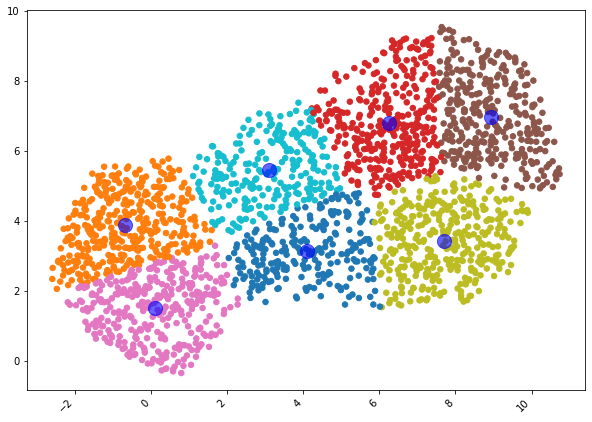

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(embedding.iloc[:,0],embedding.iloc[:,1],c=predictions, s=30, cmap='tab10')
plt.xticks(rotation=45,ha='right')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)

In [58]:
df['classes02'] = kmeans2.labels_

In [59]:
params=['max','mean','min','std']

In [60]:
agg2=df.groupby(['classes02']).agg({'Age':params,'Education':params,'Income':params}).sort_values(by=('Income',  'mean'),ascending=False)

In [61]:
agg2

Age                           Education                          \
          max       mean min        std       max      mean min       std   
classes02                                                                   
4          81  53.240122  27  13.308033         4  2.501520   1  1.295218   
1          78  53.826316  27  12.259134         4  1.423684   0  0.857663   
0          82  59.995851  41   9.849068         4  3.485477   1  0.775132   
6          73  56.631356  30   9.867835         4  1.622881   1  1.030258   
2          73  53.612717  30   9.984641         4  1.086705   0  0.461249   
5          77  52.512821  30   9.977932         4  3.438746   1  0.624347   
3          76  44.533333  26  10.063648         4  1.081818   0  0.595808   

             Income                                       
                max          mean      min           std  
classes02                                                 
4          160803.0  77712.139818   2447.0  13809.977227  
1          113734.0  69513.884211  22507.0  11516.445704  
0          666666.0  62505.697095  27450.0  42205.896730  
6           89891.0  55697.394068   4428.0  11303.827452  
2           75702.0  37656.803468   1730.0  12790.494328  
5           78028.0  37346.230769   7500.0  10610.545814  
3           59060.0  28093.169697   3502.0  10630.818956

Como fruto deste agrupamento , temos que:

- O `nível educacional médio mais alto` não está junto da maior renda média.
- Semelhantemente ao agrupamento anteriror, as menor renda média também está do cluster com menor idade média
- Novamente em todos os agrupamentos, há pessoas com escolaridade máxima, mas nem em todos, há pessoas com escolaridade mínima

# Conclusões

Comparativo entre os agrupadores PCA e UMAP:
   - O método UMAP captura melhor a estrutura global dos dados, entregando uma melhor visualização destes. 
   - Além disso, ao realizar os agrupamentos, o UMAP aprensetou desvios padrões das categorias observadas menores que os do PCA, comprovando assim que as classes possuem dados `menos dispersos` quando reduz-se a dimensão desta forma. Seguem-se os valores

In [62]:
agg1[('Income',  'std')].sum()

113995.71623299409

In [63]:
agg2[('Income',  'std')].sum()

112868.0062108422

In [64]:
agg1[('Education',  'std')].sum()

8.676271338120149

In [65]:
agg2[('Education',  'std')].sum()

5.639674295534453

In [66]:
agg1[('Age',  'std')].sum()

77.22069510288932

In [67]:
agg2[('Age',  'std')].sum()

75.31029106616441

Comparativo entre os modelos de Cluster:

   OBS: A centralização dos clusters com o SOM+UMAP, visualmente está fora do agrupamento de dados.
   - Não foi possível encontrar documentação, aplicável ao nosso problema, referente ao método SOM. Enquanto o KMeans é vastamente difundido na comunidade, sendo de mais fácil utilização
   - Apesar de não ter sido possível extrair as labels finais do SOM, o modelo ainda assim pôde ser criado, podendo ser uma opção de análise visual em detrimento do KMeans
   - Cabe para trabalhos futuros, maiores investigações acerca da aplicabilidade do SOM